# Chem 30324, Spring 2020, Homework 10

## Devon Ngo


### Due April 24, 2020

## Thermodynamics from scratch.
### Let’s calculate the thermodynamic properties of an ideal gas of CO molecules at 1 bar pressure. CO has a rotational constant B = 1.931 cm$^{-1}$ and vibrational frequency ν = 2156.6 cm$^{-1}$ . Suppose you have a 20 dm$^3$ cubic bottle containing 1 mole of CO gas that you can consider to behave ideally.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. The characteristic temperature $\Theta$ of a particular degree of freedom is the characteristic quantum of energy for the degree of freedom divided by $k_B$ . Calculate the characteristic translational, rotational, and vibrational temperatures of CO.

The characteristic temperatures can be found using the following:

$\theta_{trans} = \frac{\pi^2\hbar^2}{2mL^2k_B}$

$\theta_{rot} = \frac{hcB}{k_B}$

$\theta_{vib} = \frac{hc\tilde{\nu}}{k_B}$

In [32]:
kb = 1.38065E-23      # J/K
h = 6.62607E-34       # J s
hbar = 1.05457E-34    # J s
c = 2.99792458E8      # m/s

m = 28.01 * 1.6605e-27 # kg/mol
nu = 2156.6 # cm^-1
nu_m = nu * 100 # m^-1
B = 1.931 # cm^-1
B_m = B * 100 # m^-1
V = 20 # dm^3
V_m = 0.02 # m^3
L = 2.714 # dm
L_m = .2714 # m
n = 1 # mol


c_trans = (np.pi**2*hbar**2)/(2*kb*m*V_m**(2/3))
c_rot = h*c*B_m / kb
c_vib = h*nu_m*c / kb

print('The characteristic translational temperature is {:.3g} K.'.format(c_trans))
print('The characteristic rotational temperature is {:.3g} K.'.format(c_rot))
print('The characteristic vibrational temperature is {:.2f} K.'.format(c_vib))

The characteristic translational temperature is 1.16e-18 K.
The characteristic rotational temperature is 2.78 K.
The characteristic vibrational temperature is 3102.86 K.


### 2. Calculate the *translational partition function* of a CO molecule in the bottle at 298 K. What is the unit of the partition function?

$q_{trans, 3D} = V/\Lambda^3$, assuming the conditions that $T \gg \theta_{trans}; \quad \Lambda \ll L$ are true.

In [30]:
T = 298 # K
lam = h * (1/(2*np.pi*m*kb*T))**.5
q_trans = V_m / lam**3

print('The translational partition function at 298 K is {:.3g} units.'.format(q_trans))

The translational partition function at 298 K is 2.87e+30 units.


### 3. Plot the *rotational and vibrational partition functions* of a CO molecule in the bottle from $T$ =  200  to 2000 K (assume the CO remains a gas over the whole range). *Hint:* Use your answer to Problem 1 to simplify calculating the rotational partition function.

We use the following equations to find the partition coefficients:

$q_{rot} = \frac{T}{\theta_{rot}}$

$q_{vib} = \frac{1}{1-e^{-\theta_{vib}/T}}$

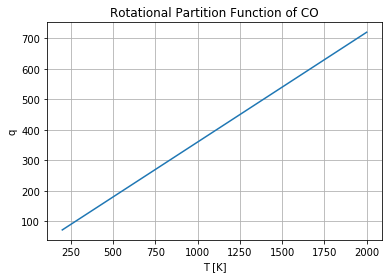

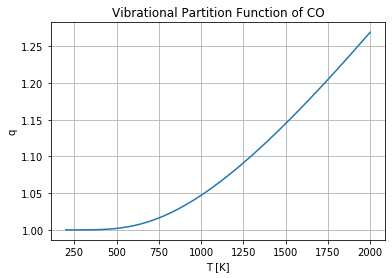

In [69]:
T = np.linspace(200, 2000, 1000)

q_rot = T/c_rot
q_vib = 1/(1-np.exp(-c_vib/T))

plt.plot(T, q_rot, label='Rot')
plt.title('Rotational Partition Function of CO')
plt.xlabel('T [K]')
plt.ylabel('q')
plt.grid()
plt.show()

plt.plot(T, q_vib, label='Vib')
plt.title('Vibrational Partition Function of CO')
plt.xlabel('T [K]')
plt.ylabel('q')
plt.grid()
plt.show()


### 4. Plot the *total translational, rotational, and vibrational energies* of CO in the bottle from $T =$ 200 to 2000 K (assume the CO remains a gas over the whole range). Which (if any) of the three types of motions dominate the total energy?

The total energies can be found using:

$U_{trans} = \frac{3}{2}RT$

$U_{rot} = RT$

$U_{vib} = R\frac{\theta_{vib}}{e^{\theta_{vib}/T}-1}$

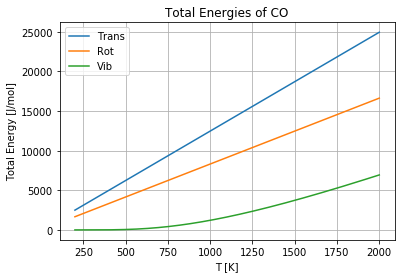

In [45]:
R = 8.314 # J/mol*K

# use eqns
U_trans = (3/2)*R*T
U_rot = R*T
U_vib = R*c_vib/(np.exp(c_vib/T)-1)

# plot
plt.plot(T, U_trans, label='Trans')
plt.plot(T, U_rot, label='Rot')
plt.plot(T, U_vib, label='Vib')
plt.legend()
plt.grid()
plt.xlabel('T [K]')
plt.ylabel('Total Energy [J/mol]')
plt.title('Total Energies of CO')
plt.show()

Translational energy dominate the total energy as seen above.

### 5. Plot the *total translational, rotational, and vibrational constant volume molar heat capacities* of CO in the bottle from $T =$ 200 to 2000 K. Which (if any) of the three types of motions dominate the heat capacity?

The heat capacities are found by:

$C_{V} = \frac{\partial U}{\partial T} $

So taking the derivatives, we get:

$C_{V,trans} = \frac{3}{2}R$

$C_{V,rot} = R$

$C_{V,vib} = R\left(\frac{\theta_{vib}}{T}\frac{e^{\theta_{vib}/2T}}{e^{\theta_{vib}/T}-1}\right)^2$

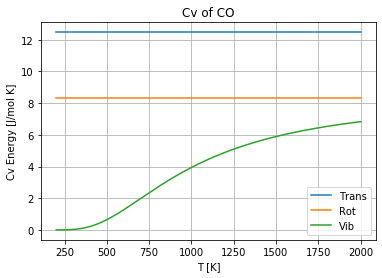

In [70]:
Cv_trans = np.ones(1000) * (3/2) * R
Cv_rot = np.ones(1000) * R
Cv_vib = R * ((c_vib/T) * (np.exp(c_vib/(2*T))/(np.exp(c_vib/T)-1)))**2

plt.plot(T, Cv_trans, label='Trans')
plt.plot(T, Cv_rot, label='Rot')
plt.plot(T, Cv_vib, label='Vib')
plt.title('Cv of CO')
plt.xlabel('T [K]')
plt.ylabel('Cv Energy [J/mol K]')
plt.grid()
plt.legend()
plt.show()

Translational motion dominates the heat capacity.

### 6. Plot the *total translational, rotational, and vibrational Helmholtz energies* of CO in the bottle from $T =$ 200 to 2000 K. Which (if any) of the three types of motions dominate the Helmholtz energy?

The Helmholtz energies can be found using:

$ A = U -TS$

To find each type, we need to calculate the respective entropies:

$S_{trans} = R\ln\left(\frac{e^{5/2}V}{N_A\Lambda^3}\right)$

$S_{rot} = R(1-\ln(\frac{\theta_{rot}}{T}))$

$S_{vib} = R\left(\frac{\theta_{vib}/T}{e^{\theta_{vib}/T}-1}-\ln(1-e^{-\theta_{vib}/T})\right)$

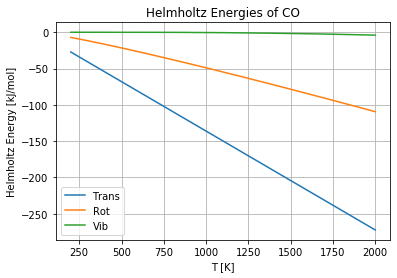

In [59]:
Na = 6.022E23 

# Entropies
S_trans = np.ones(1000) * R * np.log((np.exp(5/2)*V_m)/(Na*lam**3))
S_rot = R * (1 - np.log(c_rot/T))
S_vib = R * ((c_vib/T)/(np.exp(c_vib/T)-1) - np.log(1 - np.exp(-c_vib/T)))

# Helmholtz Energies
A_trans = U_trans - (T * S_trans)
A_rot = U_rot - (T * S_rot)
A_vib = U_vib - (T * S_vib)

plt.plot(T, A_trans/1000, label='Trans')
plt.plot(T, A_rot/1000, label='Rot')
plt.plot(T, A_vib/1000, label='Vib')
plt.title('Helmholtz Energies of CO')
plt.xlabel('T [K]')
plt.ylabel('Helmholtz Energy [kJ/mol]')
plt.grid()
plt.legend()
plt.show()

The translational energy dominates contributions made by rotational and vibrational energies.

### 7. Use your formulas to calculate $\Delta P$, $\Delta U$, $\Delta A$, and $\Delta S$ associated with isothermally expanding the gas from 20 dm$^3$ to 40 dm$^3$.

To find the change in pressure, we use the ideal gas law.

$\Delta P = \frac{RT}{V_2} - \frac{RT}{V_1}$

We know that $\Delta U=0$ when a system is isothermal. We can find the other changes using:

$\Delta S = S_{2,trans} - S_{1,trans}$

$\Delta A = \Delta U -T\Delta S$

In [68]:
Tr = 298 #K
Vf = 0.04 # m^3

dP = R*Tr*((1/Vf)-(1/V_m))
dU = 0
dS = R * (np.log((np.exp(5/2)*Vf)/(Na*lam**3)) - np.log((np.exp(5/2)*V_m)/(Na*lam**3)))
dA = -dS * Tr

print('The change in P is {:.3e} Pa'.format(dP))
print('The change in U is {:.2g} J/mol'.format(dU))
print('The change in S is {:.4g} J/mol K'.format(dS))
print('The change in A is {:.3e} J/mol'.format(dA))

The change in P is -6.194e+04 Pa
The change in U is 0 J/mol
The change in S is 5.763 J/mol K
The change in A is -1.717e+03 J/mol


## Reactions from scratch
### In 1996, Schneider and co-workers used quantum chemistry to compute the reaction pathway for unimolecular decomposition of trifluoromethanol, a reaction of relevance to the atmospheric degradation of hydrofluorocarbon refrigerants (*J. Phys. Chem.* **1996**, *100*, 6097- 6103, [doi:10.1021/jp952703m](https://pubs.acs.org/doi/abs/10.1021/jp952703m)): $$\mathrm{CF_3OH\rightarrow COF_2 + HF}$$
### Following are some of the reported results, computed at 298 K:

|              | CF$_3$OH| C(O)F$_2$ | HF |    |
|:--------------|---------:|-----------:|----:|----:| 
| $E^\text{elec}$ | -412.90047 | -312.57028 | -100.31885 | (Hartree) |
| ZPE             | 0.02889 | 0.01422 | 0.00925 | (Hartree) |
| $U^\text{trans}$ | 3.7 | 3.7| 3.7 | (kJ mol$^{-1}$) |
| $U^\text{rot }$ | 3.7 | 3.7| 2.5 | (kJ mol$^{-1}$) |
| $U^\text{vib}$ | 4.3 | 1.2 | 0 |  (kJ mol$^{-1}$) |
| $q^{\text{trans}}/V$ | $7.72\times 10^{32}$ | $1.59\times 10^{32}$ |$8.65\times 10^{31}$ | (m$^{-3}$) |
| $q^\text{rot}$ | 61830 | 679 | 9.59 | |
| $q^\text{vib}$ | 2.33 | 1.16 | 1 | |

### 8. Using the data provided, determine $\Delta U^{\circ}$(298 K)), in kJ mol$^{-1}$, assuming ideal behavior and 1 M standard state.  Recall that $U(T)$ is the sum of the contributions of all degrees of freedom.  

We find the change in total energy under standard conditions using: 

$\Delta U^{\circ} =\Delta(U_{trans} + U_{rot} + U_{vib}) + \Delta(E_0)$

where $ \Delta(E_0) = (E_{elec} + ZPE)_{product} - (E_{elec} + ZPE)_{reactant}$

In [89]:
T = 298 # K

# data from table
E_elec = [-412.90047 ,-312.57028 ,-100.31885] # Ha
ZPE = [0.02889 ,0.01422 ,0.00925] # Ha
u_trans = [3.7,3.7,3.7] 
u_rot = [3.7,3.7,2.5] 
u_vib = [4.3,1.2,0]

# calculate
dE = ( (E_elec[1] + ZPE[1] + E_elec[2] + ZPE[2]) - (E_elec[0] + ZPE[0]) ) * 2625.50 # kJ

u0 = u_trans[0] + u_rot[0] + u_vib[0]
u1 = u_trans[1] + u_rot[1] + u_vib[1]
u2 = u_trans[2] + u_rot[2] + u_vib[2]
dU = (u1 + u2) - u0

dU_tot = dE + dU
print('dU = {:.3f} kJ/mol'.format(dU_tot))


dU = 18.643 kJ/mol


### 9. Using the data provided, determine  $\Delta A^{\circ}$(298 K) in kJ mol$^{-1}$, assuming ideal behavior and 1 M standard state.  Recall that $A^\circ=E^\text{elec} + \text{ZPE}-RT\ln(q^\circ)-RT$ and that $q^\circ =(q^\text{trans}/V)q^\text{rot}q^\text{vib}/c^\circ$ in units corresponding with the standard state.

In [77]:
q_trans = [7.72E32/(Na*1E3), 1.59E32/(Na*1E3), 8.65E31/(Na*1E3)]
q_rot = [61830,679,9.59] 
q_vib = [2.33,1.16,1] 

q0 = q_trans[0]*q_rot[0]*q_vib[0]
q1 = q_trans[1]*q_rot[1]*q_vib[1]
q2 = q_trans[2]*q_rot[2]*q_vib[2]

Q = q1 * q2 / q0

dA = dE + (-R*T*np.log(Q) - R*T)/1000
print('dA = {:.3f} kJ/mol'.format(dA))

dA = -5.137 kJ/mol


### 10. Determine $\Delta G^\circ$(298 K).  Recall that $G = A + PV = A + RT$ for an ideal gas.

In [78]:
dG = dA + (R*T) / 1000 # kJ
print('dG = {:.3f} kJ/mol'.format(dG))

dG = -2.659 kJ/mol


### 11. Determine $\Delta S^{\circ}$(298 K), in J mol$^{-1}$ K$^{-1}$ , assuming a 1 M standard state. Recall that $S = (U - A)/T$.

In [79]:
dS = (dU_tot - dA)*1000 / T # kJ
print('dS = {:.3f} kJ/mol'.format(dS))

dS = 79.797 kJ/mol


### 12. Using the data provided, determine $K_c$ (298 K), assuming a 1 M standard state.  You may either determine from partition functions of from the relationship between $K_c$ and $\Delta G^\circ$.

In [80]:
# Kc from notes
Kc = Q * np.exp(-dE*1000/(R*T))
print('Kc = {:.3f}'.format(Kc))

Kc = 2.925


### 13. 1 mole of CF$_3$OH is generated in a 20 L vessel at 298 K and left long enough to come to equilibrium with respect to its decomposition reaction. What is the composition of the gas (concentrations of all the components) at equilibrium (in mol/L)?

Using an ice table, we find:

$K_c = \frac{x^2}{0.05-x}$

To find the compositions, we solve for x.

$x^2 - K_c(0.05-x) = 0$

In [85]:
from sympy import *

x = symbols('x', positive=True)

c = solve(x**2 - Kc*(0.05-x),x)
cf = 0.05-c[0]
delta = c[0]

print('Under equilibrium conditions: \nCF3OH = {0:.2e} M\nCOF2 = {1:.2e} M\nHF = {2:.2e} M'.format(cf,delta,delta))

Under equilibrium conditions: 
CF3OH = 8.27e-4 M
COF2 = 4.92e-2 M
HF = 4.92e-2 M


### 14. How, directionally, would your answer to Question 13 change if the vessel was at a higher temperature? Use the van'T Hoff relationship to determine the equilibrium constant and equilibrium concentrations at 273 and 323 K. How good was your guess?

At a higher temperature, the products will be favored in an endothermic reaction.

We have the van'T Hoff equation as

$\log\big( \frac{K_1}{K_2} \big) = -\frac{\Delta H}{R}\big( \frac{1}{T_2} - \frac{1}{T_1} \big) $

and solving for K using an online solver, we get the following:

- K(T = 273 K) = 1.205
- K(T = 298 K) = 2.926
- K(T = 323 K) = 6.193

This shows that the equilibrium constant increases with temperature, showing that the products are favored.

### 15. How, directionally, would your answer to Question 13 change if the vessel had a volume of 5 L? Redo the calculation at this volume to verify your guess.

With a smaller volume, the reaction will favor the reactants, as there are less molecules in that state compared to the product side.

Using an ice table, we get that

$K_c = \frac{x^2}{0.20-x}$

rearranging that to solve for $x$, we get

$x^2 - K_c(0.20-x) = 0$

In [86]:
c = solve(x**2 - Kc*(0.2-x),x)
cf = 0.2-c[0]
delta = c[0]

print('Under equilibrium conditions: \nCF3OH = {0:.2e} M\nCOF2 = {1:.2e} M\nHF = {2:.2e} M'.format(cf,delta,delta))

Under equilibrium conditions: 
CF3OH = 1.21e-2 M
COF2 = 1.88e-1 M
HF = 1.88e-1 M


We can see that the concentration of CF$_3$OH increases by roughly 100 while the products increased by roughly a factor of 5. This demonstrates that the reactants are favored in this case.

### 16. Consult a thermodynamics source (e.g. https://webbook.nist.gov/chemistry/) to determine $\Delta H^\circ$(298 K), $\Delta S^\circ$(298 K), and $\Delta G^\circ$(298 K) for the homologous reaction CH$_3$OH (g)$\rightarrow$ H$_2$ (g) + H$_2$CO (g).  Does the substitution of F by H make the reaction more or less favorable?

|              | CH$_3$OH|O$_2$ | H$_2$CO | H$_2$O |  unit  |
|:--------------:|:------:|:---:|:-----------:|:----:|:----:| 
|H | -201.2| 0 |-115.9|-241.8 | kJ/mol|
|S | 239.7| 205.15|218.95|188.4 | J/molK|
|G | -162.5| 0|-109.9|0 | kJ/mol|

In [88]:
dH = 2 * (-115.9) + 2 * (-241.8) - 2 * (-201.2)
dS = 2 * 219.95 + 2 * 188.4 - 2 * 239.7 - 205.15
dG = -109.9 + 162.5

print('dH = {:.2f} kJ/mol'.format(dH))
print('dS = {:.2f} J/mol K'.format(dS))
print('dG = {:.2f} kJ/mol'.format(dG))

dH = -313.00 kJ/mol
dS = 132.15 J/mol K
dG = 52.60 kJ/mol


We can see that the current reaction does not occur spontaneously because the change in Gibbs is positive. The decrease in enthalpy and increase in entropy signal that this reaction is more favorable.